# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric" 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | howard springs
Processing Record 3 of Set 1 | sangin
Processing Record 4 of Set 1 | callao
Processing Record 5 of Set 1 | kiunga
Processing Record 6 of Set 1 | whitehorse
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | kinablangan
Processing Record 9 of Set 1 | belozersk
Processing Record 10 of Set 1 | nagqu
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | bellary
Processing Record 13 of Set 1 | timimoun
Processing Record 14 of Set 1 | recani
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | talnakh
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | stanley
Processing Record 20 of Set 1 | santa elena de uairen
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 of Set 1 | thompson
Pr

Processing Record 38 of Set 4 | vila franca do campo
Processing Record 39 of Set 4 | trincomalee
Processing Record 40 of Set 4 | qarqaraly
Processing Record 41 of Set 4 | bikenibeu village
Processing Record 42 of Set 4 | antofagasta
Processing Record 43 of Set 4 | malango
Processing Record 44 of Set 4 | hami
Processing Record 45 of Set 4 | new norfolk
Processing Record 46 of Set 4 | guatire
Processing Record 47 of Set 4 | norfolk
Processing Record 48 of Set 4 | carnarvon
Processing Record 49 of Set 4 | turkmenbasy
Processing Record 0 of Set 5 | kocakoy
Processing Record 1 of Set 5 | miquelon
Processing Record 2 of Set 5 | santa maria
Processing Record 3 of Set 5 | fonadhoo
City not found. Skipping...
Processing Record 4 of Set 5 | kuchinda
Processing Record 5 of Set 5 | hermanus
Processing Record 6 of Set 5 | ijuw
City not found. Skipping...
Processing Record 7 of Set 5 | elk city
Processing Record 8 of Set 5 | constitucion
Processing Record 9 of Set 5 | tejen
Processing Record 10 of S

Processing Record 28 of Set 8 | coahuayana de hidalgo
Processing Record 29 of Set 8 | dryden
Processing Record 30 of Set 8 | lusambo
Processing Record 31 of Set 8 | wajir
Processing Record 32 of Set 8 | broome
Processing Record 33 of Set 8 | mar del plata
Processing Record 34 of Set 8 | strezhevoy
Processing Record 35 of Set 8 | bardai
Processing Record 36 of Set 8 | hasaki
Processing Record 37 of Set 8 | inarajan village
Processing Record 38 of Set 8 | tuy hoa
Processing Record 39 of Set 8 | tadworth
Processing Record 40 of Set 8 | aioun
Processing Record 41 of Set 8 | al bawiti
Processing Record 42 of Set 8 | hanover
Processing Record 43 of Set 8 | gadzhiyevo
Processing Record 44 of Set 8 | kone
Processing Record 45 of Set 8 | tres arroyos
Processing Record 46 of Set 8 | polyarnyy
Processing Record 47 of Set 8 | saint-nicolas-de-port
Processing Record 48 of Set 8 | ngong
Processing Record 49 of Set 8 | saurimo
Processing Record 0 of Set 9 | palmer
Processing Record 1 of Set 9 | san f

Processing Record 20 of Set 12 | nizhneudinsk
Processing Record 21 of Set 12 | luena
Processing Record 22 of Set 12 | praia da vitoria
Processing Record 23 of Set 12 | san fernando
Processing Record 24 of Set 12 | mata-utu
Processing Record 25 of Set 12 | andreapol'
Processing Record 26 of Set 12 | floro
Processing Record 27 of Set 12 | misasi
Processing Record 28 of Set 12 | arkhara
Processing Record 29 of Set 12 | luza
Processing Record 30 of Set 12 | qina
Processing Record 31 of Set 12 | jinchang
Processing Record 32 of Set 12 | naantali
Processing Record 33 of Set 12 | skovorodino
-----------------------------
Data Retrieval Complete      
-----------------------------


In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,12.63,61,38,1.42,CL,1707174746
1,howard springs,-12.4970,131.0470,31.04,93,56,3.27,AU,1707174746
2,sangin,32.0728,64.8359,6.77,32,0,2.40,AF,1707174746
3,callao,-12.0667,-77.1500,28.16,61,0,5.14,PE,1707174747
4,kiunga,-6.1219,141.2906,25.61,94,99,1.09,PG,1707174484


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [3]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,12.63,61,38,1.42,CL,1707174746
1,howard springs,-12.4970,131.0470,31.04,93,56,3.27,AU,1707174746
2,sangin,32.0728,64.8359,6.77,32,0,2.40,AF,1707174746
3,callao,-12.0667,-77.1500,28.16,61,0,5.14,PE,1707174747
4,kiunga,-6.1219,141.2906,25.61,94,99,1.09,PG,1707174484


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

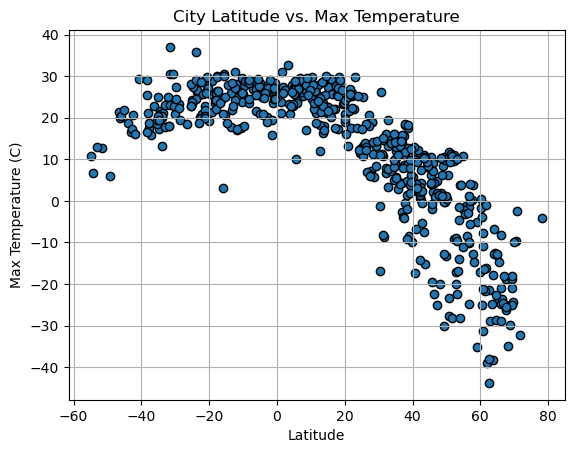

In [6]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

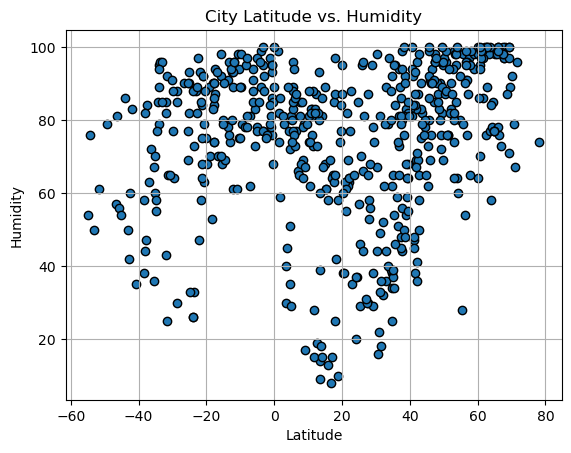

In [22]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidty')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

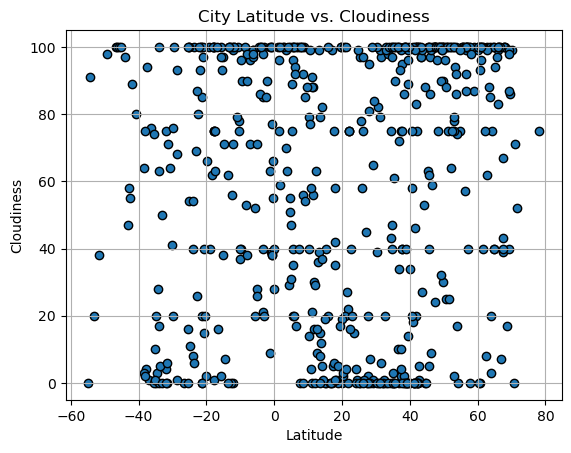

In [24]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

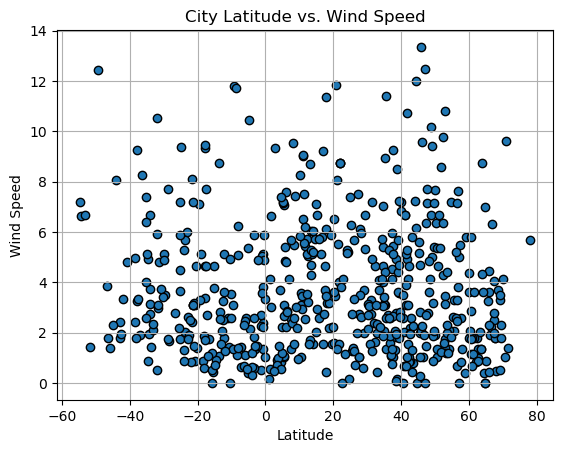

In [25]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [7]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [8]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,sangin,32.0728,64.8359,6.77,32,0,2.40,AF,1707174746
5,whitehorse,60.7161,-135.0538,-10.86,95,100,1.14,CA,1707174605
7,kinablangan,7.6947,126.5503,25.24,81,100,1.35,PH,1707174749
8,belozersk,60.0326,37.7957,-17.23,100,99,1.79,RU,1707174749
9,nagqu,31.5000,92.0000,-8.76,18,97,7.18,CN,1707174750


In [9]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,12.63,61,38,1.42,CL,1707174746
1,howard springs,-12.4970,131.0470,31.04,93,56,3.27,AU,1707174746
3,callao,-12.0667,-77.1500,28.16,61,0,5.14,PE,1707174747
4,kiunga,-6.1219,141.2906,25.61,94,99,1.09,PG,1707174484
6,port-aux-francais,-49.3500,70.2167,6.06,79,98,12.45,TF,1707174748


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7397817521778263


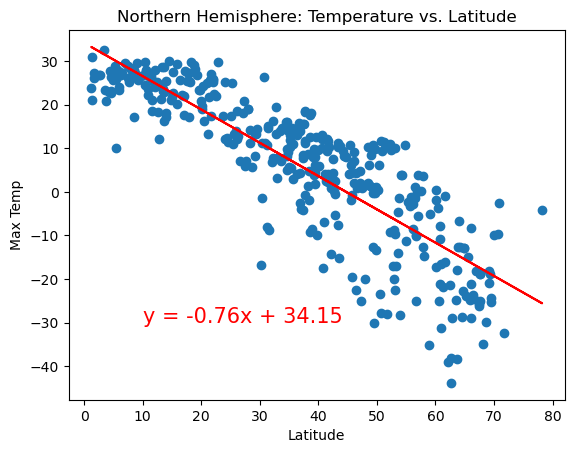

In [35]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)                            
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere: Temperature vs. Latitude')
plt.annotate(line_eq, (10,-30), fontsize=15, color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.2008629588363014


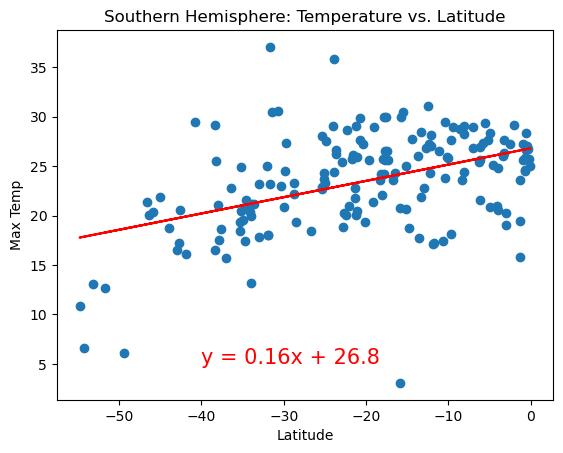

In [49]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere: Temperature vs. Latitude')
plt.annotate(line_eq, (-40,5), fontsize=15, color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There seems to be a somewhat strong correlation between temperature and latitude along the Northern Hemisphere. With an r-value of 0.74 and a slope of -0.76, it appears there is a negative correlation between latitude and max temp, meaning that the further you travel North from the equator, the lower the maximum temperature will be typically. For the Southern Hemisphere, the correlation seemed much weaker. With an r-value of only 0.20, there was a very slow and weak increase in temperature as the latitude increased. Because latitude goes from negative to positive on this graph, that means that the temperature typically shows a mild increase as you travel closer to the equator. This is consistent with the Northern Hemisphere data, however it shows significantly less correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.15133714791961997


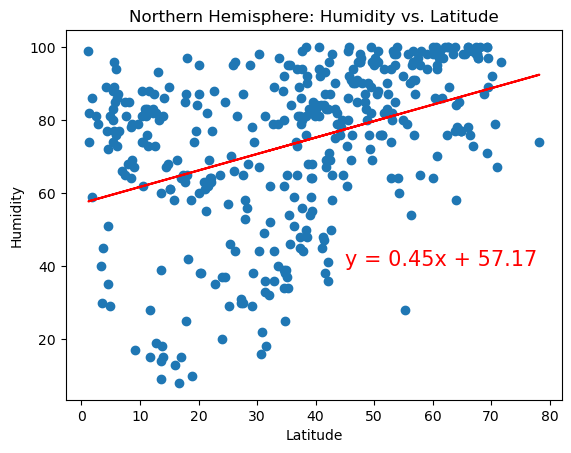

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)                            
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere: Humidity vs. Latitude')
plt.annotate(line_eq, (45,40), fontsize=15, color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.19933710518899295


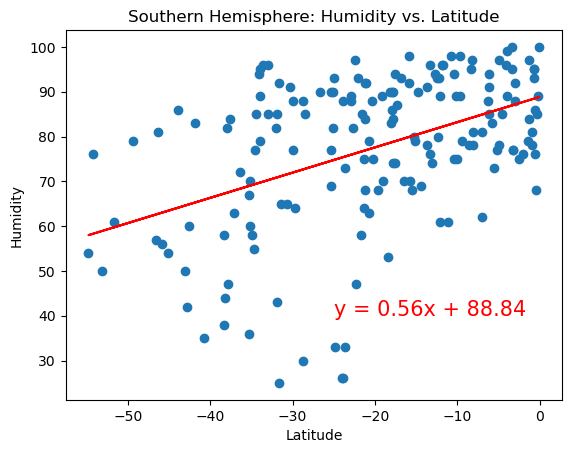

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)                            
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere: Humidity vs. Latitude')
plt.annotate(line_eq, (-25,40), fontsize=15, color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Although both scatter plots produced positive linear trendlines, I wouldn't rely on these lines as an accurate prediction for humidity's relationship to latitude. The r values for both plots are under 0.2, meaning there is a fairly large variance between points. The values tend to be spread quite far from the trendline. At first glance the trendlines may appear to show a significant relationship, however the relationship between humidity and latitude is very weak, if even present.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.051425758387327866


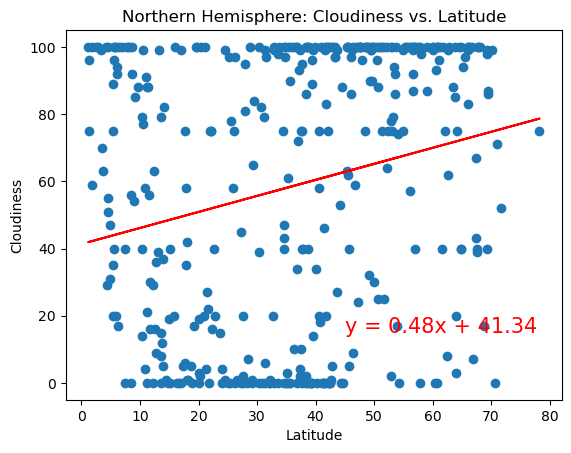

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)                            
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere: Cloudiness vs. Latitude')
plt.annotate(line_eq, (45,15), fontsize=15, color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.037558841791693234


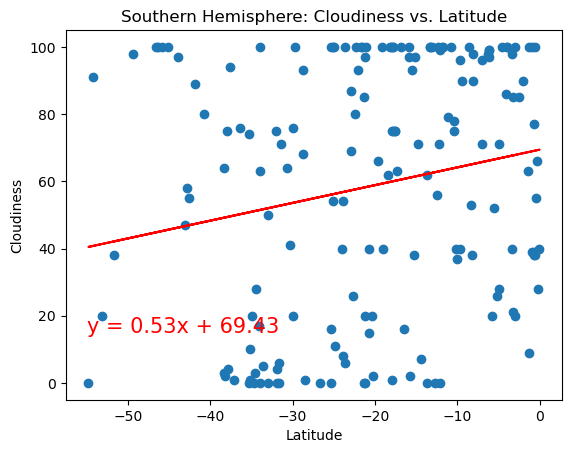

In [10]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)                            
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere: Cloudiness vs. Latitude')
plt.annotate(line_eq, (-55,15), fontsize=15, color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Out of the data measured against latitude, cloudiness has one of the weakest relationships to latitude. With a huge spread of data and no significant trends for either hemisphere, one cannot use these scatter plots to predict the cloudiness of a city based on its distance from the equator. The r-values are 0.05 for the Northern Hemisphere and 0.03 for the Southern. This low of an r-value indicates an extremely wide variance in data from the trendline. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01568127020569899


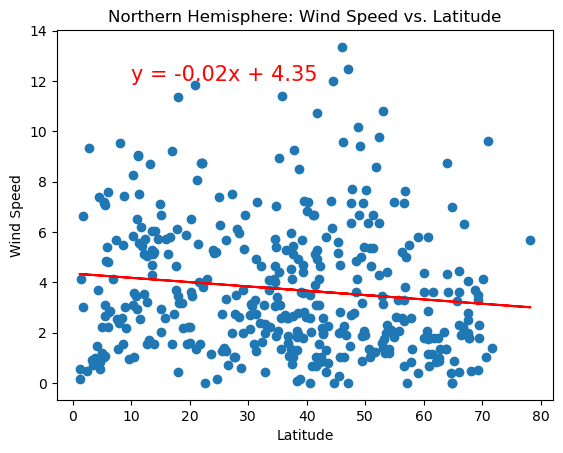

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)                            
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere: Wind Speed vs. Latitude')
plt.annotate(line_eq, (10,12), fontsize=15, color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.04770726111340805


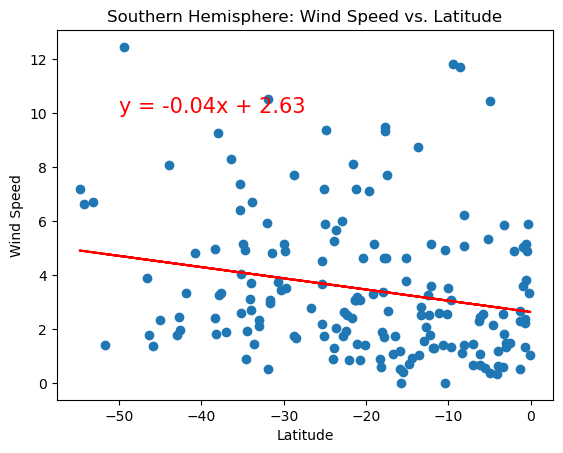

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)                            
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere: Wind Speed vs. Latitude')
plt.annotate(line_eq, (-50,10), fontsize=15, color="red")

print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Wind speed had some of the lowest correlation to latitude among the data we tested. With r-values of 0.015 and 0.047 for the Northern and Southern hemispheres, the data is extremely widespread. Both scatter plots resulted in negative trendlines, resulting in conflicting relationships. However, the slope is incredibly minimal. With almost insignificant slopes values and very low r-values, a relationship between latitude and wind speed cannot be determined.